In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
titanic=sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df =titanic.copy()
print(df.head())

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]


In [5]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
196,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
650,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
288,1,2,male,42.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
559,1,3,female,36.0,1,0,17.4000,S,Third,woman,False,NaN,Southampton,yes,False
168,0,1,male,NaN,0,0,25.9250,S,First,man,True,NaN,Southampton,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
df_object = df.select_dtypes(include=object) # sadece objectde 
df_object

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no
...,...,...,...,...,...
886,male,S,man,Southampton,no
887,female,S,woman,Southampton,yes
888,female,S,woman,Southampton,no
889,male,C,man,Cherbourg,yes


In [10]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sex          891 non-null    object
 1   embarked     889 non-null    object
 2   who          891 non-null    object
 3   embark_town  889 non-null    object
 4   alive        891 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


In [11]:
from pandas.api.types import CategoricalDtype

In [12]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [13]:
df.who.value_counts()


man      537
woman    271
child     83
Name: who, dtype: int64

In [14]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [15]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [16]:
df.alive.value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [17]:
df.alive.dtype

dtype('O')

In [18]:
df.alive = df.alive.astype(CategoricalDtype(ordered = False))

In [19]:
df.embarked = df.embarked.astype(CategoricalDtype(ordered = False))

In [20]:
df.embark_town = df.embark_town.astype(CategoricalDtype(ordered = False))

In [21]:
df.sex = df.sex.astype(CategoricalDtype(ordered = False))

In [22]:
df.alive = df.alive.astype(CategoricalDtype(ordered = False))

In [23]:
df.who = df.who.astype(CategoricalDtype(ordered = False))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    category
 13  alive        891 non-null    category
 14  alone        891 non-null    bool    
dtypes: bool(2), category(7), float64(2), int64(4)
memory usage: 50.7 KB


In [25]:
df['class']= df['class'].astype(CategoricalDtype(ordered = True))

In [26]:
df['class'].head()

0    Third
1    First
2    Third
3    First
4    Third
Name: class, dtype: category
Categories (3, object): ['First' < 'Second' < 'Third']

In [27]:
class_categori = ['Third','Second','First']
df['class'] = df['class'].astype(CategoricalDtype(categories=class_categori, ordered = True))

In [28]:
df['class'].head()

0    Third
1    First
2    Third
3    First
4    Third
Name: class, dtype: category
Categories (3, object): ['Third' < 'Second' < 'First']

In [29]:
df['pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: pclass, dtype: int64

In [30]:
df_num = df.select_dtypes(include = ['float64','int64'])
df_num.sample(5)

,survived,pclass,age,sibsp,parch,fare
60,0,3,22.0,0,0,7.2292
299,1,1,50.0,0,1,247.5208
548,0,3,33.0,1,1,20.5250
795,0,2,39.0,0,0,13.0000
513,1,1,54.0,1,0,59.4000


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [33]:
df['class'] = labelencoder.fit_transform(df['class'])

In [34]:
df['class']

0      2
1      0
2      2
3      0
4      2
      ..
886    1
887    0
888    2
889    0
890    2
Name: class, Length: 891, dtype: int64

In [35]:
df['class'].value_counts()

2    491
0    216
1    184
Name: class, dtype: int64

In [36]:
df['class']

0      2
1      0
2      2
3      0
4      2
      ..
886    1
887    0
888    2
889    0
890    2
Name: class, Length: 891, dtype: int64

In [37]:
df['sex'] = labelencoder.fit_transform(df['sex'])

In [38]:
df['sex'].value_counts()

1    577
0    314
Name: sex, dtype: int64

In [39]:
df['alive'] = labelencoder.fit_transform(df['alive'])

In [40]:
df['alive'].value_counts()

0    549
1    342
Name: alive, dtype: int64

In [41]:
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,2,man,True,NaN,Southampton,0,False
1,1,1,0,38.0,1,0,71.2833,C,0,woman,False,C,Cherbourg,1,False
2,1,3,0,26.0,0,0,7.9250,S,2,woman,False,NaN,Southampton,1,True
3,1,1,0,35.0,1,0,53.1000,S,0,woman,False,C,Southampton,1,False
4,0,3,1,35.0,0,0,8.0500,S,2,man,True,NaN,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,1,man,True,NaN,Southampton,0,True
887,1,1,0,19.0,0,0,30.0000,S,0,woman,False,B,Southampton,1,True
888,0,3,0,NaN,1,2,23.4500,S,2,woman,False,NaN,Southampton,0,False
889,1,1,1,26.0,0,0,30.0000,C,0,man,True,C,Cherbourg,1,True


In [42]:
# age ve fare değişkenlerinin normalliklerini inceleyiniz
#Dağılımın normalliğine görselleştirme yoluyla veya testler( Küçük örneklem için(n<30) 
#Shapiro-Wilk, büyük örneklem için(n>30) Kormoglov-Samirnov testi) yardımıyla karar verilir.
from scipy.stats import normaltest

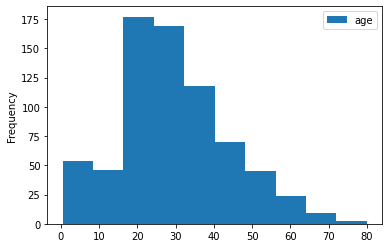

In [43]:
pd.DataFrame(df['age']).plot.hist();

In [44]:
test_value,p_value=normaltest(df.age.dropna())

In [45]:
p_value
# pvalue is less than 0.05, not normal distribution of age

0.00011709599657350757

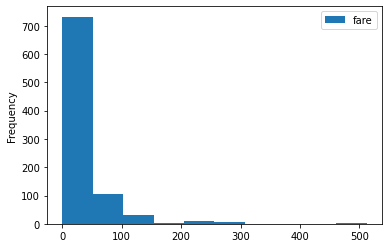

In [46]:
pd.DataFrame(df['fare']).plot.hist();

In [47]:
test_value,p_value=normaltest(df.fare.dropna())

In [48]:
p_value
# pvalue is less than 0.05, not normal distribution of fare

3.727091062842147e-197

In [49]:
# HIPOTEZ TESTI
#H0 hipotezi Titanik kazasında insanlarin sosyo ekonomik siniflari hayatta kalma oranlarına herhangi bir etkisi yoktur
#H1 hipotezi Titanik kazasında insanlarin sosyo ekonomik siniflari hayatta kalma oranlarına herhangi bir etkisi vardır.
### hipotezi 2 farkli sekilde test edecegim, bagimsiz nonparametrik olarak, ikincisi ise korelasyon katsayisi anlamliligina bakarak,

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


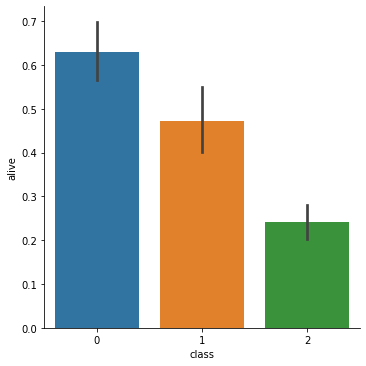

In [50]:
import seaborn as sns
sns.factorplot(x="class", y ="alive", data=df, kind="bar", size=5);
#sns.boxplot(x = "class", y = "alive", data = df);

In [51]:
data = pd.get_dummies(df.pclass)
data


,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [52]:
df =df.join(data)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,1,2,3
0,0,3,1,22.0,1,0,7.2500,S,2,man,True,NaN,Southampton,0,False,0,0,1
1,1,1,0,38.0,1,0,71.2833,C,0,woman,False,C,Cherbourg,1,False,1,0,0
2,1,3,0,26.0,0,0,7.9250,S,2,woman,False,NaN,Southampton,1,True,0,0,1
3,1,1,0,35.0,1,0,53.1000,S,0,woman,False,C,Southampton,1,False,1,0,0
4,0,3,1,35.0,0,0,8.0500,S,2,man,True,NaN,Southampton,0,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,1,man,True,NaN,Southampton,0,True,0,1,0
887,1,1,0,19.0,0,0,30.0000,S,0,woman,False,B,Southampton,1,True,1,0,0
888,0,3,0,NaN,1,2,23.4500,S,2,woman,False,NaN,Southampton,0,False,0,0,1
889,1,1,1,26.0,0,0,30.0000,C,0,man,True,C,Cherbourg,1,True,1,0,0


In [53]:
from scipy.stats import normaltest

In [54]:
test_value, p_value=normaltest(df[1])

In [55]:
p_value
#1st class distribution is not normal

4.501434598910847e-36

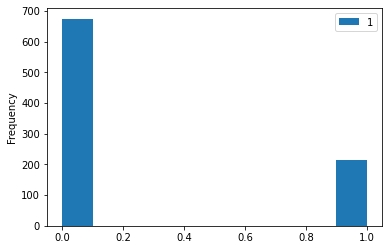

In [56]:
pd.DataFrame(df[1]).plot.hist();

In [57]:
test_value, p_value=normaltest(df[3].dropna())
if p_value < 0.05:
    print (f"pvalue is {p_value}, Not Normal distribution")
else:
    print (f"pvalue is {p_value}, Normal distribution")
  #3rd class distribution is not normal

pvalue is 0.0, Not Normal distribution


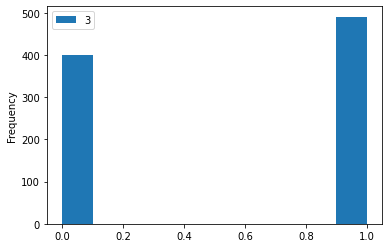

In [58]:
pd.DataFrame(df[3]).plot.hist();

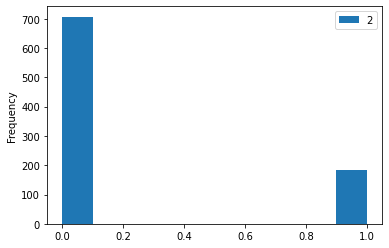

In [59]:
pd.DataFrame(df[2]).plot.hist();

In [60]:
test_value, p_value=normaltest(df[2])
p_value
#2nd class distribution is not normal

2.398324438713055e-40

In [61]:
from scipy.stats import shapiro
from scipy import stats

In [62]:
test_istatistigi, pvalue = shapiro(df[1])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))
test_istatistigi, pvalue = shapiro(df[2])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))
test_istatistigi, pvalue = shapiro(df[3])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))
test_istatistigi, pvalue = shapiro(df["alive"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

### There is no normal distribution for class1, 2 ,3 passengers and being alive,

Test İstatistiği = 0.5319, p-değeri = 0.0000
Test İstatistiği = 0.4969, p-değeri = 0.0000
Test İstatistiği = 0.6328, p-değeri = 0.0000
Test İstatistiği = 0.6167, p-değeri = 0.0000


In [63]:
stats.mannwhitneyu(df[1], df["alive"])
# looking at the p value, we reject HO hypothesis that  classes of passengers do not affect to stay alive aftermath of the accident, for class1

MannwhitneyuResult(statistic=340807.5, pvalue=6.208523720960723e-11)

In [64]:
stats.mannwhitneyu(df[2], df["alive"])
# looking at the p value, we reject HO hypothesis that  classes of passengers do not affect to stay alive aftermath of the accident, for class2

MannwhitneyuResult(statistic=326551.5, pvalue=1.1676057673875837e-16)

In [65]:
stats.mannwhitneyu(df[3], df["alive"])
# looking at the p value, we reject HO hypothesis that  classes of passengers do not affect to stay alive aftermath of the accident, for class3

MannwhitneyuResult(statistic=330561.0, pvalue=7.620511337597679e-13)

In [75]:
test_istatistigi, pvalue = stats.mannwhitneyu(df["alive"], df[1])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 340807.5000, p-değeri = 0.0000


In [67]:
df[1].corr(df["alive"], method = "spearman")  # 1, 1st class passengers

#There is positive correlation btw 1st class passengers and stay alive, 
#this correlation is negative for 3rd class passengers and slightly positive for 2nd class passengers

0.2859037677837427

In [68]:
df[2].corr(df["alive"], method = "spearman")  # 2, 2nd class passengers

0.09334857241192887

In [69]:
df[3].corr(df["alive"], method = "spearman")   #3, 2, third class passengers

-0.32230835737297003

In [70]:
##Nonparametrik Hipotez Testi

In [71]:
from scipy.stats import stats
stats.spearmanr(df[1],df["alive"])

SpearmanrResult(correlation=0.2859037677837427, pvalue=3.190582241752924e-18)

In [72]:
test_istatistigi, pvalue = stats.spearmanr(df[1],df["alive"])  # looking at the p value, we reject HO hypothesis that  classes of passengers do not affect 
                                                              # to stay alive aftermath of the accident
print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.2859, p-değeri = 0.0000


In [73]:
test_istatistigi, pvalue = stats.kendalltau(df[2],df["alive"])   #there is positive correlation for class1 and class2, negative correlation for class3

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.0933, p-değeri = 0.0054


In [74]:
test_istatistigi, pvalue = stats.spearmanr(df[3],df["alive"])  # looking at the p value, we reject HO hypothesis that there is no difference 
                                                              # btw class of passengers and stay alive, crucial point is that  
print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))  #there is positive correlation for class1 and class2, negative correlation for class3

Korelasyon Katsayısı = -0.3223, p-değeri = 0.0000
